# **Dataset: 👗 Fashion Forecast Trending Textile Insights 🌟**

- Nama          : Dila Aura Futri
- Email         : dilalovegood@gmail.com
- Id Dicoding   : a459xbm129

# 1. Business Understanding

**Tujuan**

Analisis dataset Fashion Forecast: Trending Textile Insights bertujuan untuk memperoleh wawasan mengenai tren fashion terkini berdasarkan fitur seperti Brand, Category, Color, Size, dan Material. Wawasan ini dapat membantu pelaku bisnis fashion dalam:
- Mengidentifikasi atribut produk yang paling menarik di pasar.
- Mengoptimalkan strategi produk dan penetapan harga.
- Memprediksi potensi penjualan untuk meningkatkan revenue.

Dengan memahami tren yang sedang berkembang, perusahaan dapat mengambil keputusan berbasis data sebelum memasuki atau mengembangkan bisnis di industri fashion.



**Deskripsi Variabel**
- Brand : Merek dari produk pakaian, dipilih dari sejumlah merek populer seperti Nike, Adidas, Puma, Under Armour, Reebok, dan New Balance.

- Category : Kategori dari produk pakaian, seperti Kaos (T-shirt), Celana Jeans, Gaun (Dress), Jaket, Sweater, atau Sepatu (Shoes).
- Color : Warna dari produk pakaian, dipilih dari berbagai pilihan warna seperti Merah, Biru, Hijau, Kuning, Hitam, dan Putih.
- Size : Ukuran dari produk pakaian, dinyatakan dalam ukuran standar seperti XS, S, M, L, XL, atau XXL.
- Material : Komposisi bahan dari produk pakaian, termasuk pilihan seperti Katun (Cotton), Poliester (Polyester), Nilon (Nylon), Wol (Wool), Sutra (Silk), dan Denim.
- Price : Harga dari produk pakaian, diukur dalam mata uang lokal.



**Pertanyaan bisnis**
1. Bagaimanan distribusi harga terhadap kategori Brand, Category, Color, Size, dan Material
2. Bagaimanan frekueansi dari kategori Brand, Category, Color, Size, dan Material
3. Apakah terdapat hubungan tertentu antara fitur-fitur tersebut dengan harga (Price)?
4. Atribut apa saja yang paling berpengaruh terhadap harga produk fashion?

# 2. Import Library yang Dibutuhkan

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from google.colab import files
from google.colab import userdata
import os
import shutil
import zipfile

# 3. Data Loading

dataset di import dari gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Ganti dengan path sesuai lokasi kamu menyimpan file
file_path = "/content/drive/MyDrive/clothes_price_prediction_data.csv"

fashion = pd.read_csv(file_path)
fashion


,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


Output: Ada 1.000 baris (records atau jumlah pengamatan) dalam dataset.
Terdapat 6 kolom yaitu: Brand, Category, Color, Size, Material dan Price

# 4. Exploratory Data Analysis
untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.


In [5]:
#cek infromasi dataset
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


Output:
- Terdapat 5 kolom dengan tipe object, yaitu: Brand, Category, Color, Size, Material (fitur non-numerik).
- Terdapat 1 kolom numerik dengan tipe data float64 yaitu: Price.                

In [6]:
#cek deskripsi statistik
fashion.describe(include='all')

,Brand,Category,Color,Size,Material,Price
count,1000,1000,1000,1000,1000,1000.000000
unique,6,6,6,6,6,NaN
top,Under Armour,Jacket,Yellow,XS,Polyester,NaN
freq,179,191,173,196,175,NaN
mean,NaN,NaN,NaN,NaN,NaN,106.289000
std,NaN,NaN,NaN,NaN,NaN,53.695444
min,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,NaN,59.750000
50%,NaN,NaN,NaN,NaN,NaN,108.000000
75%,NaN,NaN,NaN,NaN,NaN,150.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# 4.1 Cek Missing value

In [7]:
#cek missing value pada setiap fitur
fashion.isnull().sum()

,0
Brand,0
Category,0
Color,0
Size,0
Material,0
Price,0


tidak ada missing value dari dataset ini

In [8]:
#cek duplikat
fashion.duplicated().sum()

np.int64(0)

tidak ada duplikasi dari dataset ini

# 4.2 Menangani Outliers

Pada kasus ini, akan mendeteksi outliers dengan teknik visualisasi data (boxplot).

<Axes: xlabel='Price'>

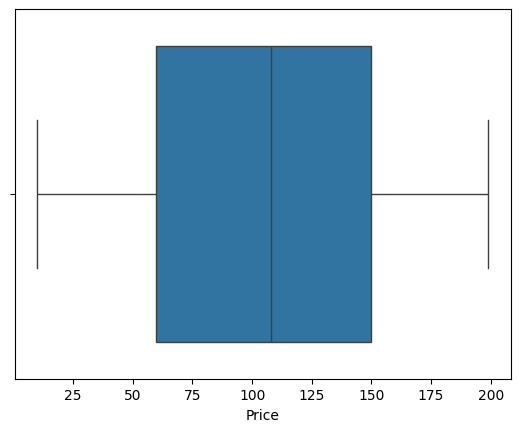

In [9]:
#fitur Price
sns.boxplot(x=fashion['Price'])

Output:
Tidak ada outlier pada fitur price

# 4.3 Distribusi Harga berdasarkan Kategori

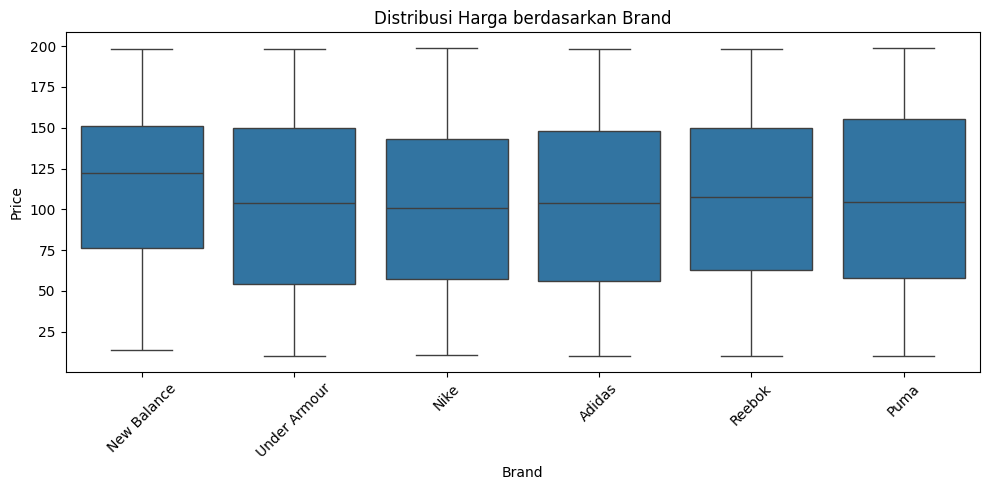

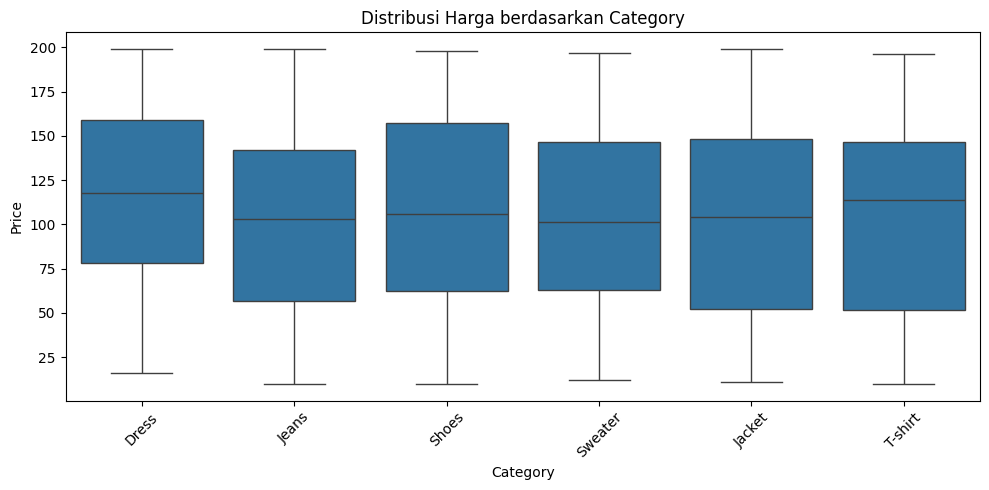

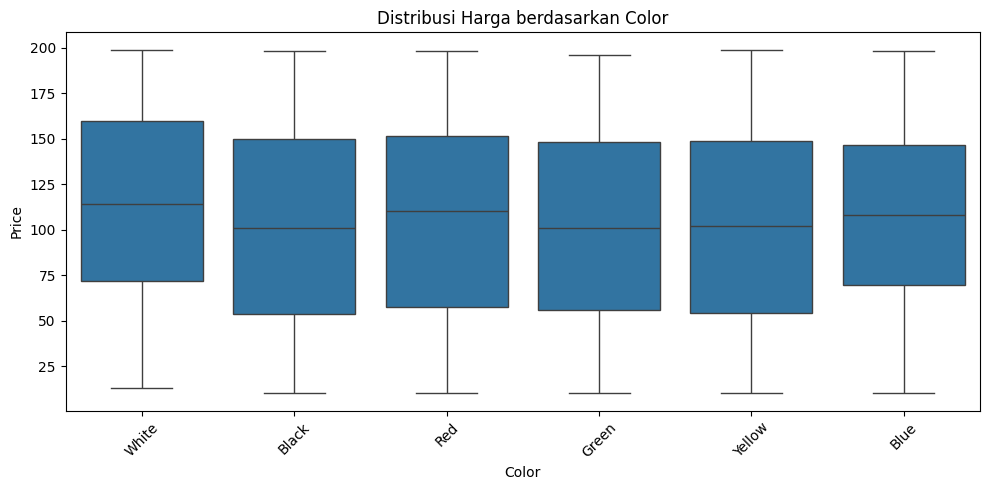

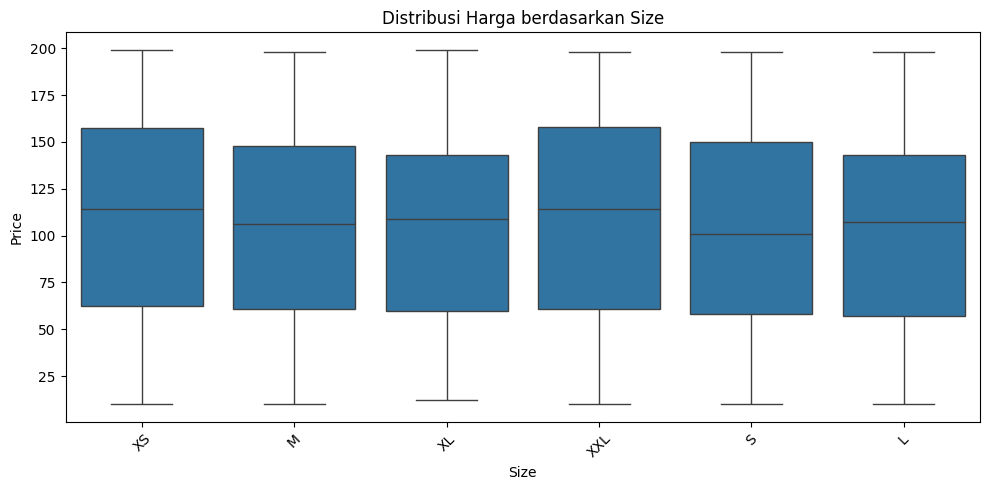

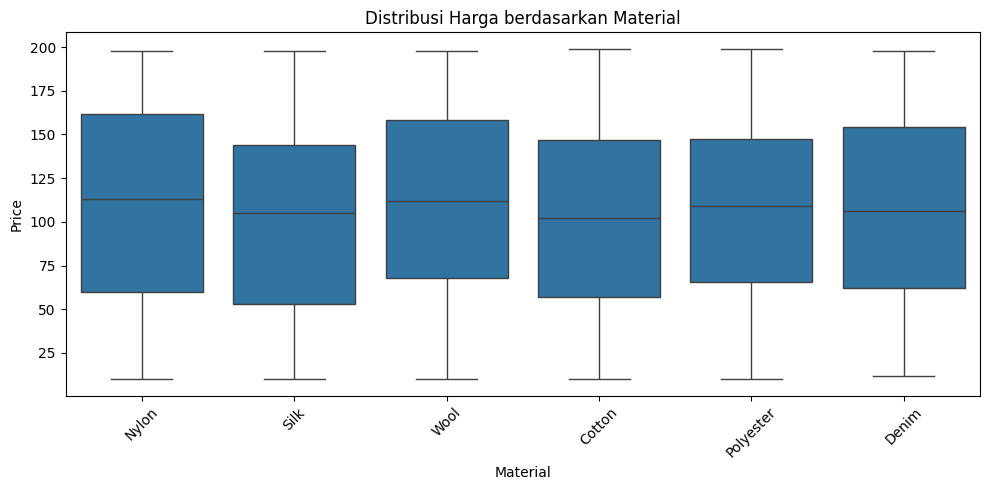

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Brand', 'Category', 'Color', 'Size', 'Material']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='Price', data=fashion)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi Harga berdasarkan {col}')
    plt.tight_layout()
    plt.show()


Output:

1. Distribusi Harga berdasarkan Size : Semua ukuran (XS, S, M, L, XL, XXL) menunjukkan distribusi harga yang mirip, baik dari median maupun rentang interkuartil (IQR). Median harga berada di sekitar angka 100–120 untuk semua size.

2. Distribusi Harga berdasarkan Brand :
New Balance dan Puma terlihat memiliki median harga sedikit lebih tinggi dibanding brand lain. Brand seperti Under Armour, Nike, Adidas, dan Reebok memiliki median harga yang lebih rendah namun dengan distribusi yang serupa.


3. Distribusi Harga berdasarkan Category : Dress dan Shoes memiliki median harga tertinggi, menunjukkan produk dalam kategori ini cenderung lebih mahal T-shirt dan Jacket punya median yang lebih rendah dan IQR yang lebih luas, menunjukkan variasi harga lebih besar dalam kategori ini.

4. Distribusi Harga berdasarkan Color : Semua warna memiliki distribusi harga yang mirip, tidak ada perbedaan signifikan. Putih dan Merah sedikit lebih tinggi median-nya dibanding warna lain, tapi tidak signifikan. Hal ini menunjukkan bahwa warna produk tidak banyak memengaruhi harga.

5. Distribusi Harga berdasarkan Material : Nylon dan Wool cenderung memiliki harga median tertinggi, menunjukkan produk berbahan ini bisa lebih mahal. Silk justru memiliki median harga lebih rendah, meskipun biasanya dianggap bahan mewah—bisa jadi karena jenis produk yang dijual.


Kesimpulan Umum: Faktor paling berdampak terhadap harga tampaknya adalah Category dan Material, di mana perbedaan median dan rentang harga cukup terlihat.

# 4.4 Visualisasi Frekuensi Kategori

<ipython-input-11-4fc32d5ef201>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fashion, x=col, order=order, palette='viridis')


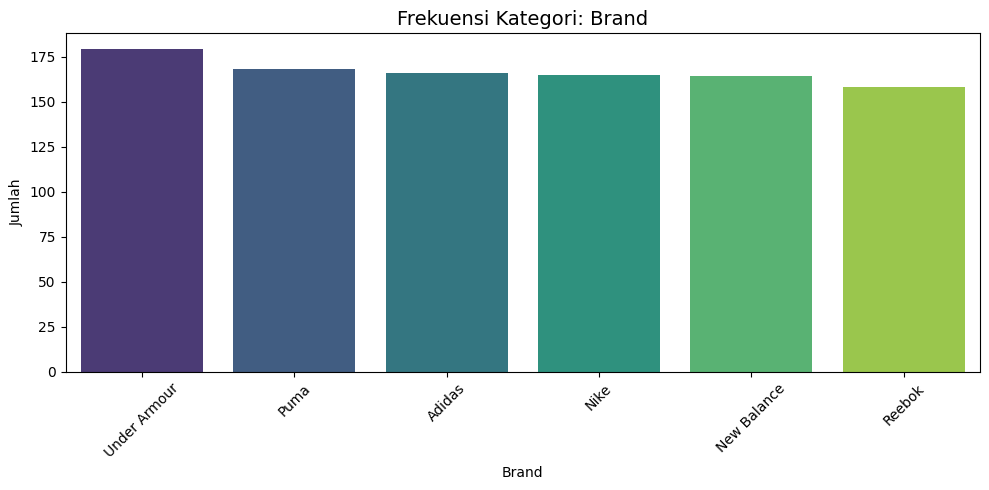

<ipython-input-11-4fc32d5ef201>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fashion, x=col, order=order, palette='viridis')


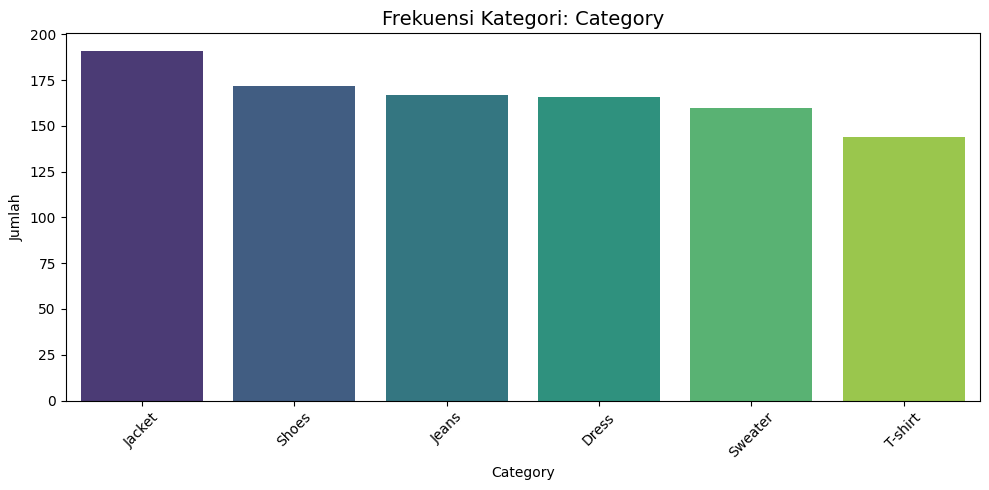

<ipython-input-11-4fc32d5ef201>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fashion, x=col, order=order, palette='viridis')


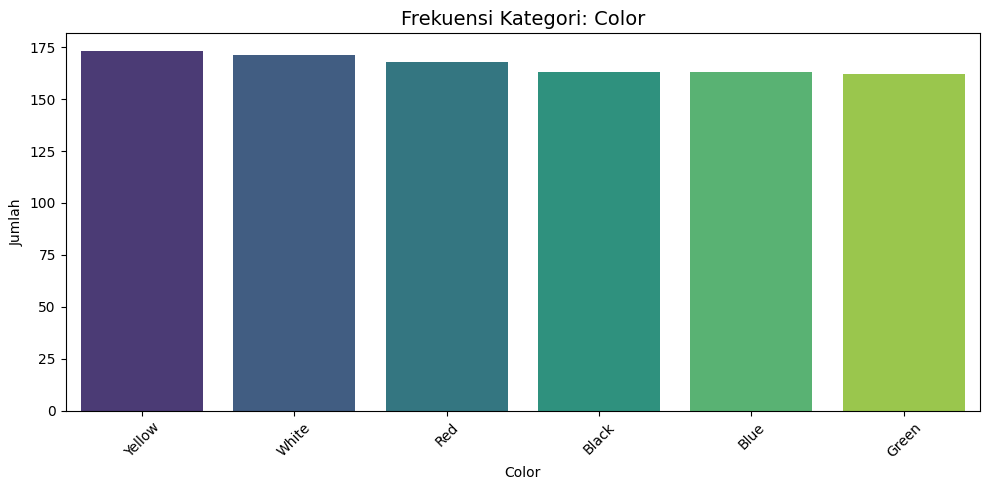

<ipython-input-11-4fc32d5ef201>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fashion, x=col, order=order, palette='viridis')


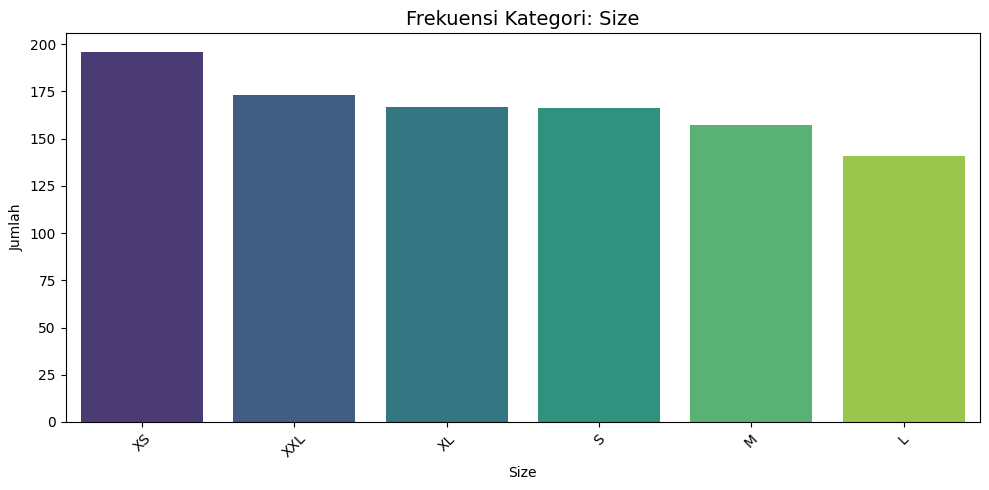

<ipython-input-11-4fc32d5ef201>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fashion, x=col, order=order, palette='viridis')


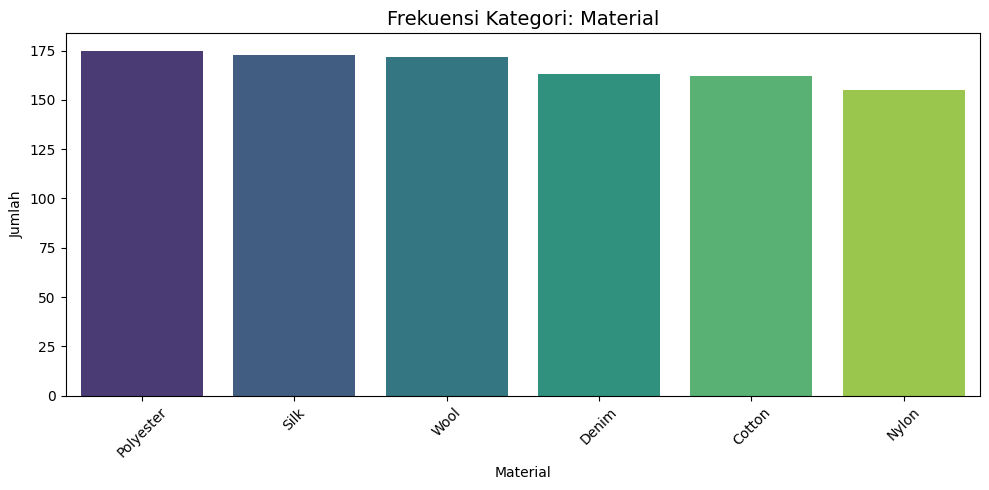

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Brand', 'Category', 'Color', 'Size', 'Material']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    order = fashion[col].value_counts().index  # Urutkan berdasarkan frekuensi
    sns.countplot(data=fashion, x=col, order=order, palette='viridis')
    plt.title(f'Frekuensi Kategori: {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()


Output:

Berdasarkan hasil grafik di atas dapat disimpulkan bahwa setiap fitur memiliki kategori dengan frekuensi yang tidak jauh berbeda, Berikut beberapa kategori yang memiliki frekuensi tertinggi:

- Brand dengan frekuensi tertinggi adalah brand Under Armour, menunjukkan brand ini paling dominan dalam dataset.
- Pada fitur Category, kategori dengan jumlah produk terbanyak adalah Jacket.
- Untuk fitur Color, warna yang paling sering muncul adalah Yellow.
- Pada fitur Size, ukuran XS memiliki frekuensi tertinggi dibandingkan ukuran lainnya.
- Sementara itu, pada fitur Material, bahan Polyester menjadi material yang paling banyak digunakan.

Kesimpulan ini menunjukkan bahwa kelima fitur tersebut memiliki sebaran yang cukup merata.

# 5. Data Preparation

## 5.1 Encoding Fitur Kategori

In [12]:
from sklearn.preprocessing import LabelEncoder
# Buat list semua kolom kategorikal (non-numerik)
categorical_cols = fashion.select_dtypes(include=['object']).columns.tolist()

# Inisialisasi label encoder
le = LabelEncoder()

# Apply label encoder ke semua kolom kategorikal
for col in categorical_cols:
    fashion[col] = le.fit_transform(fashion[col].astype(str))

fashion

,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113
...,...,...,...,...,...,...
995,3,2,0,0,3,176
996,3,1,3,5,4,110
997,4,4,1,4,1,127
998,5,4,0,5,1,69


## 5.2 Pembagian dataset

Data dipecah menjadi dua bagian: data latih untuk melatih model (80%) dan data uji untuk mengevaluasi model (20%).

In [13]:
from sklearn.model_selection import train_test_split

X = fashion.drop(columns='Price')
y = fashion['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Model Development

Ketiga algoritma yang akan digunakan, antara lain:

- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print("MSE Linear Regression:", mse_lr)


MSE Linear Regression: 2959.4546943669325


In [15]:
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error

param_rf = {
    'n_estimators': (50, 200),
    'max_depth': (5, 50),
    'min_samples_split': (2, 10)
}

opt_rf = BayesSearchCV(
    RandomForestRegressor(random_state=42),
    param_rf,
    n_iter=32,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

opt_rf.fit(X_train, y_train)
best_rf = opt_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE Random Forest:", mse_rf)


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(5), np.int64(10), np.int64(200)] before, using random point [np.int64(23), np.int64(6), np.int64(165)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(5), np.int64(10), np.int64(200)] before, using random point [np.int64(21), np.int64(6), np.int64(173)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(5), np.int64(10), np.int64(200)] before, using random point [np.int64(17), np.int64(2), np.int64(154)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(5), np.int64(10), np.int64(200)] before, using random point [np.int64(40), np.int64(

MSE Random Forest: 2919.9867600313087


Output : Mendefinisikan tiga pipeline model untuk melatih dan evaluasi: SVM, Random Forest, dan XGBoost. Pipeline ini memudahkan pengelolaan preprocessing dan training secara terstruktur.

In [16]:
from xgboost import XGBRegressor

param_xgb = {
    'n_estimators': (50, 200),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'subsample': (0.5, 1.0)
}

opt_xgb = BayesSearchCV(
    XGBRegressor(random_state=42),
    param_xgb,
    n_iter=32,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

opt_xgb.fit(X_train, y_train)
best_xgb = opt_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("MSE XGBoost:", mse_xgb)


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(50), 0.5] before, using random point [0.08565869976525829, np.int64(9), np.int64(72), 0.5731657133907271]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, np.int64(3), np.int64(50), 0.5] before, using random point [0.031060747127876535, np.int64(5), np.int64(74), 0.6768007352431151]
  warnings.warn(


MSE XGBoost: 2927.29248046875


# 6. Evaluasi Model dengan Mean Squared Error (MSE)

                           MSE
Linear Regression  2959.454694
Random Forest      2919.986760
XGBoost            2927.292480


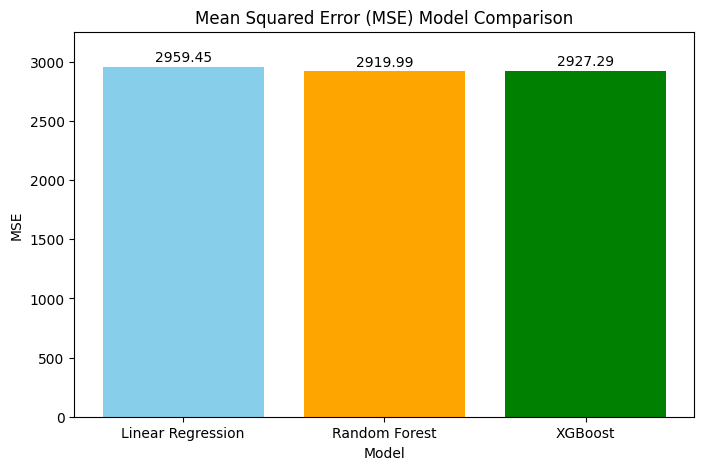

Kesimpulan:
Model dengan MSE terkecil adalah Random Forest, menunjukkan performa terbaik pada dataset ini.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Buat dataframe ringkas hasil MSE
mse_results = {
    "Linear Regression": mse_lr,
    "Random Forest": mse_rf,
    "XGBoost": mse_xgb
}

mse_df = pd.DataFrame.from_dict(mse_results, orient='index', columns=['MSE'])
print(mse_df)

# 2. Visualisasi hasil MSE
plt.figure(figsize=(8,5))
bars = plt.bar(mse_df.index, mse_df['MSE'], color=['skyblue', 'orange', 'green'])
plt.title("Mean Squared Error (MSE) Model Comparison")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.ylim(0, max(mse_df['MSE']) * 1.1)

# Tampilkan nilai MSE di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f"{yval:.2f}", ha='center', va='bottom')

plt.show()

# 3. Kesimpulan singkat
print("Kesimpulan:")
best_model = mse_df['MSE'].idxmin()
print(f"Model dengan MSE terkecil adalah {best_model}, menunjukkan performa terbaik pada dataset ini.")


Output:
- Random Forest memiliki performa terbaik MSE terkecil: 2919.99. Menunjukkan kemampuan terbaik dalam meminimalkan error prediksi di antara ketiga model.

- XGBoost memiliki performa yang hampir setara dengan Random Forest yaitu MSE: 2927.29. Selisih sangat kecil dengan Random Forest, menunjukkan keduanya mampu menangkap pola kompleks data.

- Linear Regression memiliki MSE tertinggi yaitu 2959.45, meskipun sedikit lebih tinggi, model ini tetap kompetitif dan memiliki keunggulan dalam kesederhanaan dan interpretabilitas.

Perbedaan MSE antar model tergolong kecil. Selisih antar model berkisar ±40 poin, menunjukkan semua model cukup baik secara prediktif.

Output:
Plot ini menunjukkan perbandingan error antara ketiga model pada data train dan test.

# Contoh Prediksi Data Baru

In [24]:
import pandas as pd

# Dictionary model yang sudah dilatih
model_dict = {
    "Linear Regression": lr,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

# Ambil 1 data uji untuk prediksi
prediksi = X_test.iloc[:1]
y_true = y_test[:1].values

# Simpan hasil prediksi
pred_dict = {'y_true': y_true}

for name, model in model_dict.items():
    pred_dict[f'prediksi_{name}'] = model.predict(prediksi).round(1)

# Tampilkan dalam bentuk tabel
print(pd.DataFrame(pred_dict))


   y_true  prediksi_Linear Regression  prediksi_Random Forest  \
0     101                       104.2                   114.4   

   prediksi_XGBoost  
0             107.5  


Output:

- Data pada tabel menunjukkan hasil prediksi dari tiga model regresi, yaitu Linear Regression, Random Forest, dan XGBoost, dibandingkan dengan nilai aktual (ground truth) sebesar 101.

- Linear Regression menghasilkan prediksi sebesar 104.2, yang berarti terjadi selisih (error) sebesar +3.2 dari nilai aktual. Ini menunjukkan bahwa model Linear Regression memberikan hasil yang paling mendekati nilai sebenarnya, dengan deviasi paling kecil.

- Random Forest memberikan hasil prediksi sebesar 114.4, menyimpang +13.4 dari nilai aktual. Ini merupakan deviasi terbesar di antara ketiga model, menandakan bahwa prediksi dari Random Forest kurang akurat untuk data ini.

- XGBoost memprediksi nilai sebesar 107.5, dengan selisih +6.5 terhadap nilai sebenarnya. Meskipun tidak seakurat Linear Regression, hasil prediksinya masih dalam batas kesalahan yang moderat dan lebih baik dibandingkan Random Forest.



Kesimpulan: Linear Regression menunjukkan performa terbaik karena menghasilkan prediksi paling mendekati nilai aktual. XGBoost berada di posisi kedua, masih tergolong akurat meskipun memiliki deviasi sedang Random Forest memiliki error tertinggi, menunjukkan kinerjanya kurang optimal untuk contoh ini.